In [2]:
#import the important libraries needed
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style


In [3]:
#Now we have to import the some more important libraries needed

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [9]:
#load the data file
def importdata():
    balance_data = pd.read_csv('C:/Users/rajpr/Desktop/Prabhat/Machine Learning/Assignment_Decision boundary Using SVM classifier/IRIS_Data.csv',header=0)
    print("Dataset Length:", len(balance_data))
    print("Dataset shape:", balance_data.shape)
    print("Dataset: ", balance_data.head())
    return balance_data

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets:  for training data and for testing data. 

With this function, you don't need to divide the dataset manually. By default, Sklearn train_test_split will make random partitions for the two subsets.

In [10]:
# split the dataset

def split_dataset(balance_data):
    X= balance_data.values[:,0:3]
    Y= balance_data.values[:,4]
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
    return X,Y,X_train,X_test,y_train,y_test

In [7]:
dataset= importdata()
dataset.head()

Dataset Length: 150
Dataset shape: (150, 5)
Dataset:     sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [8]:
# describe o/p data
df = pd.DataFrame(dataset) 
print(df.describe())

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Introduction to SVMs:

In machine learning, support vector machines (SVMs, also support vector networks) 
are supervised learning models with associated learning algorithms that analyze data used for 
classification and regression analysis.

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. 
In other words, given labeled training data (supervised learning), 
the algorithm outputs an optimal hyperplane which categorizes new examples.

In [11]:
# Here we have to define the train_using_ Support Vector Machine(svm)
def train_using_svm(X_train,X_test,y_train):
    model=svm.SVC(kernel='rbf',C=100, gamma=0.01)
    model.fit(X_train,y_train)
    return model
    

Here we have to define the make_meshgrid
The purpose of meshgrid is to create a rectangular grid out of an array of X-values and an array of Y-values

In [12]:

def make_meshgrid(X, Y, h=.02):
    X_min, X_max = X.min() - 1, X.max() + 1
    Y_min, Y_max = Y.min() - 1, Y.max() + 1
    XX, YY = np.meshgrid(np.arange(X_min, X_max, h),np.arange(Y_min, Y_max, h))
    return XX, YY

Then, fit your model on train set using fit() and perform prediction on the test set using predict() .

In [13]:
def prediction(X_test,model):
    y_pred=model.predict(X_test)
    print("predicted values: ")
    print(y_pred)
    return y_pred

Cal accuracy function computes subset accuracy: 

the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true. 

Ground truth (correct) labels. Predicted labels, as returned by a classifier. 

If False , return the number of correctly classified samples.

In [14]:
def cal_accuracy(y_test,y_pred):
    print("Confusion matrix:",confusion_matrix(y_test,y_pred))
    print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

main Function: When the program is run, the python interpreter runs the code sequentially. 
Main function is executed only when it is run as a Python program. 
It will not run the main function if it imported as a module.

In [18]:
def main():
    data= importdata()
    
    X, Y, X_train, X_test, y_train, y_test= splitdataset(data)
    model = train_using_svm(X_train,X_test,y_train)
    print("Training model: ")
    
    y_pred= prediction(X_test,model)
    cal_accuracy(y_test,y_pred)
    X0, X1 = X[:, 0], X[:, 1]
    XX, YY = make_meshgrid(X0, X1)
    
    data.plot(kind="scatter", x="sepal.length", y="sepal.width")

Dataset Length: 150
Dataset shape: (150, 5)
Dataset:     sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
Training model: 
predicted values: 
['Virginica' 'Setosa' 'Virginica' 'Setosa' 'Virginica' 'Virginica'
 'Setosa' 'Setosa' 'Virginica' 'Setosa' 'Setosa' 'Virginica' 'Setosa'
 'Setosa' 'Virginica' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica'
 'Virginica' 'Virginica' 'Setosa' 'Virginica' 'Setosa' 'Versicolor'
 'Virginica' 'Versicolor' 'Setosa' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Setosa' 'Versicolor' 'Setosa'
 'Versicolor' 'Virginica' 'Virginica' 'Setosa' 'Versicolor' 'Virginica'
 'Virginica' 'Setosa']
Confusion matr

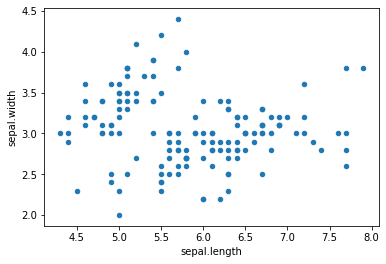

In [19]:
if __name__ == "__main__":
    main()